# Checking GLORIA CD37 side-scan sonar data

Author: Ellie Fisher (@efisher008) and Alice Fremand (@almand_BAS)

Date: 07/02/2025

## Aim

The goal of this tutorial is to showcase how to read and check the GLORIA CD37 side-scan sonar data available from the UK Polar Data Centre

## Survey background

The GLORIA instrument was operated on the Royal Research Ship (RRS) Charles Darwin CD37 research cruise during January – April 1989. The study area was the Scotia Sea, North Scotia Ridge (NSR), South Sandwich Island, South Sandwich Arc, and West Antarctic Peninsula (WAP) continental shelf, within the broader region of the Southern Ocean.

The cruise was carried out in order to gain a better understanding of the Southern Ocean with a particular focus on: 
- Tectonic history 
- Active tectonic processes 
- Paleoceanography 
- Stratigraphy 
- Ice dynamics during glacial intervals 

## List of available GLORIA data

The metadata record for the GLORIA CD37 dataset can be found from the UK Polar Data Centre: 

Barker, P., Livermore, R., Tomlinson, J., Woollett, R., Cunningham, A., Larter, R., Pudsey, C., & Jordan, R. (2025). Geological Long Range Inclined Asdic (GLORIA) seabed side-scan sonar raw data acquired on Charles Darwin CD37 cruise in 1989 (Version 1.0) [Data set]. NERC EDS UK Polar Data Centre. https://doi.org/10.5285/cf87183c-51df-4588-be73-ad0a45fea2d7

The GLORIA CD37 NetCDF files are available from: 
https://ramadda.data.bas.ac.uk/repository/entry/show?entryid=cf87183c-51df-4588-be73-ad0a45fea2d7


## Downloading the data via the Ramadda interface

From the [metadata page](https://doi.org/10.5285/cf87183c-51df-4588-be73-ad0a45fea2d7), it is possible to access the data by clicking on ‘GET DATA’. You will then be redirected to our Ramadda repository.

From the interface, it is possible to download the data individually by clicking on the dataset you want to download. It is also possible to zip and download the data together by clicking at the top of the Ramadda interface on the down arrow next to “Polar Data Centre > DOI” and Zip and Download Tree:

![GLORIA-CD37-zip-and-download-tree](../images/GLORIA-CD37-zip-and-download-tree.png "Downloading your data with Ramadda")
<center>Screenshot showing how to zip and download the data from Ramadda</center>

To download a ZIP file containing all pass files, use the following command (the preceeding ! runs the line as a Linux command):

In [ ]:
!wget "https://ramadda.data.bas.ac.uk/repository/entry/show/UK+Polar+Data+Centre/DOI/Geological+Long+Range+Inclined+Asdic+%28GLORIA%29+seabed+side-scan+sonar+raw+data+acquired+on+Charles+Darwin+CD37+cruise+in+1989/netcdf?entryid=synth%3Acf87183c-51df-4588-be73-ad0a45fea2d7%3AL25ldGNkZg%3D%3D&output=zip.tree"

To download a single file, run the following command:

In [ ]:
!wget --content-disposition --trust-server-names "https://ramadda.data.bas.ac.uk/repository/entry/get/CD37_GLORIA_PASS169.nc?entryid=synth%3Acf87183c-51df-4588-be73-ad0a45fea2d7%3AL25ldGNkZi9DRDM3X0dMT1JJQV9QQVNTMTY5Lm5j" -O "CD37_GLORIA_PASS169.nc"

## To set up the virtual environment with Conda (if desired):
These commands will need to be run in a Linux environment.

If you do not have conda on your machine, you will need to install it. This is a package manager which is used with languages like Python.

>conda create -n gloria_env

>conda activate gloria_env

>conda config --env --add channels conda-forge

>conda config --env --set channel_priority strict

>conda install netCDF4

The new environment is then able to activated again simply by running: `conda activate gloria_env`. 

Any packages or modules which are installed while the environment is active will be added to the environment configuration and can be seen by running: `conda list`

## To set up the virtual environment on UNIX (if desired):

In the folder where you have your code, you need to launch:

`python3 -m venv gloria_env`

It will create a folder with all the environment for python. To activate the virtual environment you need to launch it:

`source gloria_env/bin/activate.csh`

You need to make sure that [gloria_env] appears before your name on the machine. 
That means that you are using the virtual environment.
Then you need to upgrade pip which is the command that installs the packages:

`python3 -m pip install --upgrade pip`

And install the other libraries:

`python3 -m pip install netCDF4`

## Useful dependencies

For the code to run, it is important to install the correct dependancies and libraries. In particular the following library is crucial for the code to run:

- **netCDF4** module to check NetCDF data in Python
- **pandas** package to work with CSV data
- **numpy** package to work with numerical data and 3-dimensional arrays
- **matplotlib** package to plot geographic and non-geographic data
- **cartopy** package to plot geographic (map-based) data

If any of the modules specified in this notebook are not currently installed in your Linux environment, you will need to install these, for example with `pip install`.

In this tutorial, the virtual environment is already set up. The list of the current libraries loaded is given in the list below.

In [1]:
!pip list

Package                   Version
------------------------- --------------
affine                    2.4.0
anyio                     4.8.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     25.1.0
babel                     2.17.0
beautifulsoup4            4.13.3
bleach                    6.2.0
Brotli                    1.1.0
cached-property           1.5.2
Cartopy                   0.24.0
certifi                   2025.1.31
cffi                      1.17.1
cftime                    1.6.4
charset-normalizer        3.4.1
click                     8.1.8
click-plugins             1.1.1
cligj                     0.7.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.1
cycler                    0.12.1
debugpy                   1.8.12
decorator                 5.2.1
defusedxml                0.7.1
exceptiongroup  

## Load the relevant modules

In [1]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import cartopy
from cartopy import crs as ccrs, feature as cfeature
import os
import pprint

%matplotlib inline

## Check the metadata information

If your downloaded files are not in the directory you are running this code from, you will need to specify the full or relative path to that directory.

A NetCDF file contains global attributes, group attributes, variable attributes and data. We will guide you through how to read the NetCDF file in Python below.

First, let's open the netCDF file and have a look at the global attributes of the *CD37_GLORIA_PASS169.nc* netCDF file

In [2]:
f = "CD37_GLORIA_PASS169.nc"
fnc = nc.Dataset(f)

print(fnc.ncattrs())

['Conventions', 'title', 'summary', 'acknowledgement', 'keywords', 'citation', 'license', 'history', 'source', 'comment', 'institution', 'contributor_name', 'contributor_role', 'project', 'references', 'publisher_name', 'publisher_type', 'publisher_email', 'publisher_url', 'time_coverage_start', 'time_coverage_end', 'geospatial_lon_min', 'geospatial_lon_max', 'geospatial_lat_min', 'geospatial_lat_max', 'geospatial_bounds_crs', 'metadata_link']


You can display key information about the NetCDF dataset (global attributes, variables, dimensions, groups) by just using a print function:

In [3]:
print(fnc)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: ACDD-1.3, CF-1.12
    title: Geological Long Range Inclined Asdic (GLORIA) seabed side-scan sonar raw data acquired on Charles Darwin CD37 cruise in 1989
    summary: The GLORIA instrument was operated on the Royal Research Ship (RRS) Charles Darwin 37 (CD37) research cruise during January - April 1989. The study area was the Scotia Sea, North Scotia Ridge (NSR), South Sandwich Island, South Sandwich Arc, and West Antarctic Peninsula (WAP) continental shelf, within the broader region of the Southern Ocean. Raw data are presented in NetCDF format. These have been pre-processed from the binary pass data using the bas-gloria package (https://github.com/antarctica/bas-gloria). The data have been improved with additional metadata such as latitude, longitude and depth.
    acknowledgement: This project was funded by BAS under project code B6153: Scotia Sea tectonic evolution and palaeo-circulation.


You can also access directly a single global attribute value by treating their values as if they are key-value pairs in a dictionary:

In [4]:
print(fnc.__dict__['history'])

The acquisition instrument for this dataset was GLORIA II, operated on RRS Charles Darwin. The sonar towfish was 8m in length, and towed 300m behind the vessel at 50m depth. Data were collected on the RRS Charles Darwin CD37 scientific research cruise and stored on 9-track magnetic tapes, which are currently held by the British Antarctic Survey, Cambridge. Raw data were recovered from 9-track magnetic tapes in 2021. Transcription from tape was performed by Troika International/Interica. There was some data loss, due to stiction causing read errors. Heat treatment of the tapes improved data recovery at this stage. A Python package was developed by Paul Breen (BAS) to handle the GLORIA raw pass files. Conversion to NetCDF and generation of quicklooks for the GLORIA data from CD37 was performed in 2024/2025 using the package. This can be accessed here: https://github.com/antarctica/bas-gloria. Decoding of the data has been performed following the structure as descibed in Table 1 of Searle

## Checking the NetCDF data

Now let's access the data by opening the NetCDF file in "read" mode ("r" option in nc.Dataset object construction), and store the metadata information in lists to work with later.

In [5]:
with nc.Dataset(f, mode = "r") as ds:
    
    group_names = list(ds.groups.keys())

    # Initialize a dictionary to store each group's attributes as an indexable sub-dict. 
    attributes = {}
    data = {}

    # Iterate through all groups and access their data
    for group_name, group in ds.groups.items():
        
        # Access the 'scan' variable which contains the sample values (data)
        if 'scan' in group.variables:
            scan_data = group.variables['scan'][:]
            data.update({group_name: scan_data})

    for group_name in group_names:
        
        group = ds.groups[group_name]

        # Initialize a dictionary to store attributes of the current group
        attributes_of_group = {}
        
        # Access and store group attributes
        for attr_name in group.ncattrs():
            attr_value = group.getncattr(attr_name)
            attributes_of_group[attr_name] = attr_value  # Store attributes in a dictionary
        
        # Append the dictionary of attributes for the current group to the list
        attributes.update({group_name: attributes_of_group})

## List group attributes and data structure

The group structure is as follows: each group represents one GLORIA scan, and the group attributes provide the metadata for this scan. For complete passes, 720 scans will be present. We can check the number of group and list them as follows:

In [6]:
print(f"Groups found: {group_names}")
print(f" The total number of passes is {len(group_names)}")

Groups found: ['scan1', 'scan2', 'scan3', 'scan4', 'scan5', 'scan6', 'scan7', 'scan8', 'scan9', 'scan10', 'scan11', 'scan12', 'scan13', 'scan14', 'scan15', 'scan16', 'scan17', 'scan18', 'scan19', 'scan20', 'scan21', 'scan22', 'scan23', 'scan24', 'scan25', 'scan26', 'scan27', 'scan28', 'scan29', 'scan30', 'scan31', 'scan32', 'scan33', 'scan34', 'scan35', 'scan36', 'scan37', 'scan38', 'scan39', 'scan40', 'scan41', 'scan42', 'scan43', 'scan44', 'scan45', 'scan46', 'scan47', 'scan48', 'scan49', 'scan50', 'scan51', 'scan52', 'scan53', 'scan54', 'scan55', 'scan56', 'scan57', 'scan58', 'scan59', 'scan60', 'scan61', 'scan62', 'scan63', 'scan64', 'scan65', 'scan66', 'scan67', 'scan68', 'scan69', 'scan70', 'scan71', 'scan72', 'scan73', 'scan74', 'scan75', 'scan76', 'scan77', 'scan78', 'scan79', 'scan80', 'scan81', 'scan82', 'scan83', 'scan84', 'scan85', 'scan86', 'scan87', 'scan88', 'scan89', 'scan90', 'scan91', 'scan92', 'scan93', 'scan94', 'scan95', 'scan96', 'scan97', 'scan98', 'scan99', 'sca

To access the group attribute of a particular scan (here **scan1**); you can just use the following command:

In [7]:
attributes['scan1']

{'pass_number': np.int64(169),
 'scan_number': np.int64(1),
 'hour_mark_flag': np.int64(0),
 'slant_range_correction_code': np.int64(50),
 'zero_flag': np.int64(0),
 'pulse_repetition_period': np.int64(51),
 'vehicle_heading': '104',
 'year': '89',
 'edge_mark_start': np.int64(65535),
 'edge_mark_end': np.int64(65535),
 'julian_day': '061',
 'hours': '18',
 'minutes': '00',
 'seconds': '',
 'checksum': np.int64(392),
 'unused': np.int64(0),
 'datetime': '1989-03-02T18:00:00',
 'latitude': np.float64(-59.3227),
 'longitude': np.float64(-43.0247),
 'depth_IBCSO': np.int64(-4039)}

The variable 'scan', with dimensions samples, contains 994 sample values, which are the reflected acoustic returns from the instrument signal. This can be checked as follows:

In [8]:
print(len(data['scan1']))
print(data['scan1'])

994
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 6 3 4 4 5 4 7 0 0 6 0 0 0 1 3 4
 5 0 2 3 4 0 0 6 7 2 1 2 2 5 3 2 2 2 0 7 0 2 3 0 4 5 4 2 4 1 0 1 0 0 0 3 7
 0 7 4 3 2 5 9 9 13 6 5 3 1 4 10 6 3 4 5 3 4 7 6 4 10 3 2 3 8 8 6 3 2 1 4
 6 0 0 3 5 2 4 4 6 6 3 5 11 6 6 9 12 5 5 10 8 9 6 4 7 8 6 8 5 3 8 4 4 3 5
 5 8 5 0 7 4 4 2 12 10 10 10 6 6 11 9 12 12 17 14 19 14 13 17 14 24 22 32
 9 15 26 30 24 14 17 16 23 23 9 4 7 18 10 15 26 23 19 18 33 20 33 32 33 20
 25 33 42 25 26 26 18 13 14 20 19 32 34 33 32 18 18 29 32 29 35 38 44 23
 31 28 26 21 23 22 29 27 39 20 30 27 23 41 48 54 47 28 47 37 39 29 30 33
 32 35 36 42 33 31 44 51 39 37 46 36 31 38 39 43 23 36 36 40 37 50 37 49
 56 45 58 64 64 60 43 40 55 49 54 45 51 40 48 46 52 57 28 39 34 47 55 62
 46 42 56 40 58 70 56 48 47 47 37 39 55 56 40 43 59 48 65 45 57 70 55 64
 57 47 54 49 53 42 65 55 53 59 45 52 64 45 61 67 67 59 44 65 64 74 62 61
 58 55 55 56 52 69 50 47 62 41 41 60 53 60 46 62 46 37 39 45 43 46 36 37
 40 37 39 47 27 34 36 37 27 38 38 31 3

## Plot data for first scan

We can now create a simple plot with the sonar samples from the first scan (or any desired scan number) in our pass file. The x axis is the sample number, from port to starboard, and the y axis is the amplitude of the returned signal. A peak is observed in the middle of the plotting window, which is the direct nadir of the GLORIA instrument looking down at the water column beneath. There is a small "envelope" around this peak, which are the returns from either side of the nadir. This envelope contains nonvalid information and is usually corrected in post-processing.

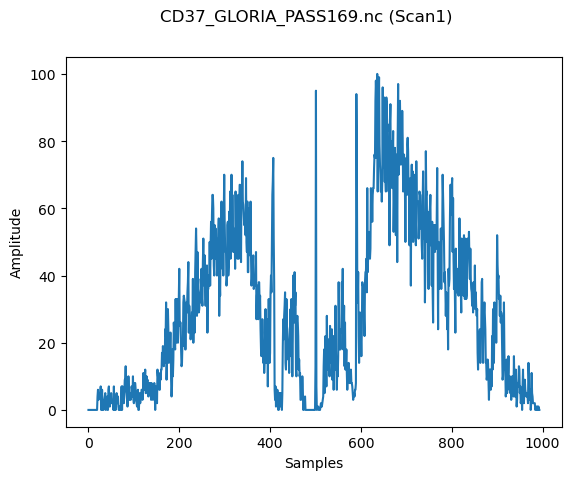

In [9]:
scan = 'scan1'

# Create figure and add title
fig = plt.figure()
fig.suptitle(f"{os.path.basename(f)} ({scan.capitalize()})")
ax = fig.add_subplot()

# Plot axis labels
ax.set_ylabel('Amplitude')
ax.set_xlabel('Samples')

# Plot the scan data
ax.plot(data['scan1'], label='scan{:.0f}'.format(data['scan1'][0]))

plt.show() 


# Interrogate time coverage and scanning frequency of pass file

It is also possible to have a look at the start and end time of each file. Most of the scans have a ~6 hours length.

In [10]:
# Storing datetime values for all scans in the pass inside a list.
datetimes = []
[datetimes.append(attributes[i]['datetime']) for i in attributes]

# Finding the start and end of GLORIA data in the pass.
start = dt.datetime.strptime(min(datetimes), "%Y-%m-%dT%H:%M:%S")
end = dt.datetime.strptime(max(datetimes), "%Y-%m-%dT%H:%M:%S")
# Creating a timedelta duration object from this information.
dur = end-start

In [11]:
# Function to extract the individual time components from the duration
def convert_timedelta(duration):
    days, seconds = duration.days, duration.seconds
    hours = days * 24 + seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = (seconds % 60)
    return hours, minutes, seconds

hours, minutes, seconds = convert_timedelta(dur)

print(f"The time coverage of this pass is {start} - {end}, which corresponds to {hours} hours and {minutes} minutes.")

The time coverage of this pass is 1989-03-02 18:00:00 - 1989-03-02 23:59:00, which corresponds to 5 hours and 59 minutes.


The mean scanning frequency of the pass can be calculated by: `time coverage / number of scans`.

In [12]:
# Finding the number of scans in the pass file.
scans = len(data)

print(f"The scanning frequency of this pass file is {dur / scans}.") # This produces another timedelta object - the final field is microseconds.

The scanning frequency of this pass file is 0:00:29.916667.


## Generate summary statistics for each attribute

Let's display summary statistics for a desired attribute using `pd.describe()`. This example is for the depth of the seafloor (extracted from IBCSO data):

In [13]:
depth = []

for group in attributes:
    depth.append(attributes[group]['depth_IBCSO'])

depth = pd.DataFrame(depth, columns = ['depth_IBSCO (m)'])
depth.describe()

,depth_IBSCO (m)
count,720.00000
mean,-3820.40000
std,426.34211
min,-4102.00000
25%,-4005.00000
50%,-3905.00000
75%,-3860.00000
max,-1678.00000


Compute these statistics for all metadata attributes, and combine these into a Pandas dataframe. 
As the ship heading attribute has a dtype of string, this will need converting to an integer.

In [14]:
depth = []
prp = []
heading = []

for group in attributes:
    depth.append(attributes[group]['depth_IBCSO'])
    prp.append(attributes[group]['pulse_repetition_period'])
    heading.append(int(attributes[group]['vehicle_heading']))

In [15]:
stats = pd.DataFrame([prp, depth, heading]).transpose()
stats = stats.set_axis(['Pulse repetition period (s)', 'Depth_IBCSO (m)', 'Heading_deg (deg)'], axis=1)
stats.describe()

,Pulse repetition period (s),Depth_IBCSO (m),Heading_deg (deg)
count,720.0,720.00000,720.000000
mean,51.0,-3820.40000,108.644444
std,0.0,426.34211,1.728827
min,51.0,-4102.00000,103.000000
25%,51.0,-4005.00000,107.000000
50%,51.0,-3905.00000,109.000000
75%,51.0,-3860.00000,110.000000
max,51.0,-1678.00000,113.000000


## Bounding box of GLORIA dataset

By extracting the coordinate information from the pass, it is possible to find the geographic bounds of the data in the currently loaded pass file.

In [16]:
latitude = []
longitude = []

[latitude.append(attributes[group]['latitude']) for group in attributes]
[longitude.append(attributes[group]['longitude']) for group in attributes]

west, east, south, north = min(np.array(longitude)), max(np.array(longitude)), min(np.array(latitude)), max(np.array(latitude))

print(f"The bounding box for the current PASS is: {west}W {east}E {south}S {north}N")

The bounding box for the current PASS is: -43.0247W -41.74535E -59.53945S -59.3227N


The coordinate values can be used to create a map of the studied area. Here we will use the `cartopy` library.

In [17]:
# Create a figure with Matplotlib
fig = plt.figure()
fig.set_size_inches(14,14)

# Add a projection and set extent of the axes
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_title(f"Bounding box of {os.path.basename(f)}")
ax.set_extent([west - 25, east + 25, south - 10, north + 10])

# Close the figure to suppress display at this point
plt.close()

Add features from Cartopy's Feature Interface (coastlines, land, ocean) using GeoAxes, add gridlines, and display figure in window.

In [18]:
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

gl = ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')

Plot latitude and longitude data of the pass file as a line (representing the instrument track).

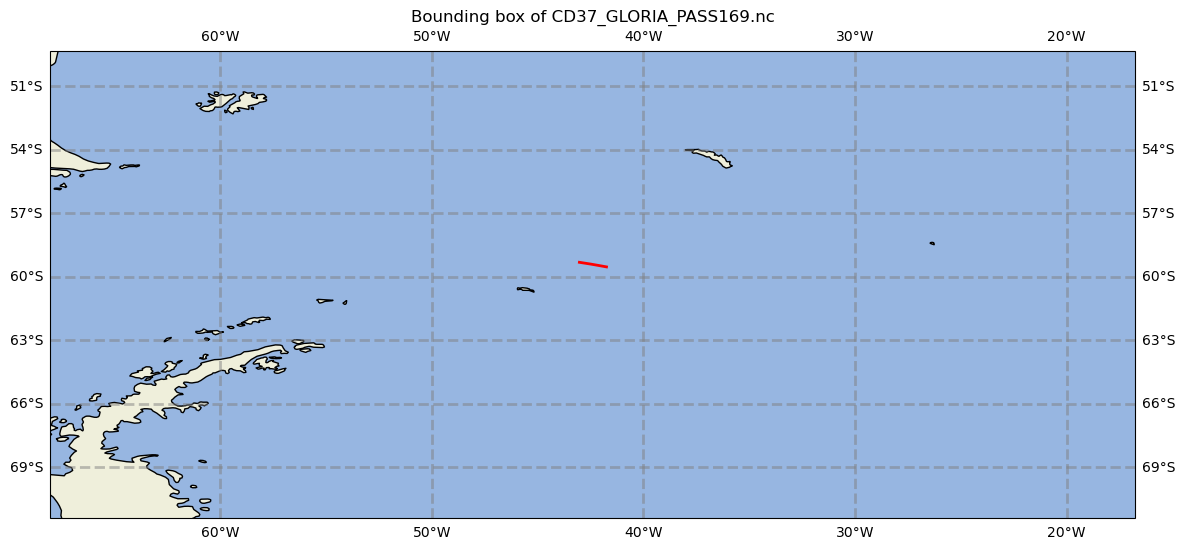

In [19]:
ax.plot(longitude, latitude, color="red", linewidth=2)

fig

## Plot a simple sonargram with data from first scan in the file

Creating the parameters of the sonargram plot.

In [20]:
nscans = len(data)
nsamples = 994
xaxis = np.linspace(1.0, float(nscans), nscans)
yaxis = np.linspace(1.0, float(nsamples), nsamples)

Populating the plot with the extracted data from the pass.

In [21]:
# Store each scan as a column in a matrix
cols = np.zeros((nsamples, nscans))

# Storing sample values from each scan inside their respective columns (along the x axis).
for i, scan in enumerate(data):
    cols[:,i] = data[scan]

# Creating the matrix for the colourbar (sample value)
mat = np.asmatrix(cols)

dx = xaxis[1] - xaxis[0]
dy = yaxis[1] - yaxis[0]
xlim = [min(xaxis), max(xaxis)]
ylim = [max(yaxis), min(yaxis)]
extent = [min(xaxis) - dx/2.0, max(xaxis) + dx/2.0, max(yaxis) + dy/2.0, min(yaxis) - dy/2.0]
std_contrast = np.nanmax(np.abs(mat)[:])
contrast = 1.0

Add the axis labels, title and colourbar, and show the image in window.

Text(0.5, 0.98, 'CD37_GLORIA_PASS169.nc')

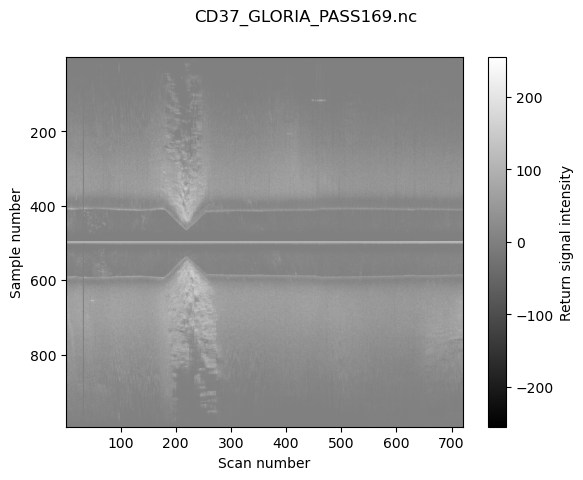

In [22]:
plt.imshow(mat, cmap="gray", aspect="auto", extent=extent, vmin=-std_contrast/contrast, vmax=std_contrast/contrast)

plt.gca().set_xlabel("Scan number")
plt.gca().set_ylabel("Sample number")
plt.xlim(xlim)
plt.ylim(ylim)
plt.colorbar(label="Return signal intensity")
plt.suptitle(os.path.basename(f))

## References

#### The list of references below give additional context regarding the cruise and the processing of GLORIA data. 

- CD37 889: RRS Charles Darwin Scotia and Bellingshausen Seas Geophysics January 1989 - April 1989 (https://www.bodc.ac.uk/resources/inventories/cruise_inventory/reports/cd37.pdf)  

- CD37 cruise inventory - RRS Charles Darwin CD37 - cruise summary report- https://www.bodc.ac.uk/resources/inventories/cruise_inventory/report/4591/  

- Cunningham, Alexander P.. 1998 Geophysical Investigations of the North Scotia Ridge. University of London, PhD Thesis. 

- Tomlinson, J.S.; Pudsey, C.J.; Livermore, R.A.; Larter, Robert D. ; Barker, Peter F.. 1992 Long-range sidescan sonar (GLORIA) survey of the Antarctic Peninsula Pacific margin. In: Yoshida, Y.; Kaminuma, K.; Shiraishi, K., (eds.) Recent progress in Antarctic earth science. Proceedings of the Sixth International Symposium on Antarctic Earth Sciences. Ranzan, Saitama, Japan, September 1991. Tokyo, Terra Scientific Publishing, 423-429. 

- Searle, R. C., Le Bas, T. P., Mitchell, N. C., Somers, M. L., Parson, L. M., & Patriat, P. H. (1990). GLORIA image processing: The state of the art. Marine geophysical researches, 12, 21-39. 

- Searle, R. C., & Hunter, P. M. (1986). The use of GLORIA long-range sidescan sonar for deep-ocean mapping. In Autocarto London (Vol. 2, pp. 339-388). 

- Cunningham, A. P.; Barker, P. F.; Tomlinson, J. S.. 1998 Tectonics and sedimentary environment of the North Scotia Ridge region revealed by side-scan sonar. Journal of the Geological Society, 155 (6). 941-956. 10.1144/gsjgs.155.6.0941

- Livermore, R. A., & Woollett, R. W. (1993). Seafloor spreading in the Weddell Sea and southwest Atlantic since the Late Cretaceous. Earth and Planetary Science Letters, 117(3-4), 475-495.